# Lec 04. Multivariate Linear Mode

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Preparation Data - Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

https://www.rdocumentation.org/packages/AppliedPredictiveModeling

In [3]:
data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv("data/"+i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [4]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]

test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data  : ", train_data.shape)
print("train label : ", train_label.shape)

print("test data   : ", test_data.shape)
print("test label  : ", test_label.shape)

train data  :  (951, 228)
train label :  (951, 1)
test data   :  (316, 228)
test label  :  (316, 1)


In [5]:
arr = train_data.columns
print(arr)

Index(['FP001', 'FP002', 'FP003', 'FP004', 'FP005', 'FP006', 'FP007', 'FP008',
       'FP009', 'FP010',
       ...
       'NumCarbon', 'NumNitrogen', 'NumOxygen', 'NumSulfer', 'NumChlorine',
       'NumHalogen', 'NumRings', 'HydrophilicFactor', 'SurfaceArea1',
       'SurfaceArea2'],
      dtype='object', length=228)


In [6]:
train_data.head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
661,0,1,0,0,1,0,0,1,0,0,...,4.177811,0.584815,0.000000,0.000,0.000,0.000,1.386294,-1.606542,6.812456,6.812456
662,0,1,0,1,1,1,1,1,0,0,...,5.092358,0.642355,0.693147,0.375,0.000,0.000,1.609438,-0.441330,9.753834,12.029604
663,1,1,1,1,1,0,0,1,0,1,...,4.023944,0.000000,1.098612,0.000,0.000,0.000,0.693147,-0.384859,8.245324,8.245324
665,0,0,1,0,0,0,1,0,0,0,...,3.510455,0.000000,0.000000,0.000,0.000,0.000,0.693147,-2.373472,0.000000,0.000000
668,0,0,1,1,1,1,0,0,1,0,...,3.317541,0.694335,0.000000,0.000,0.375,0.375,0.693147,-0.070987,9.913535,9.913535


In [7]:
x, y = Variable(torch.from_numpy(train_data.values)).float(), Variable(torch.from_numpy(train_label.values)).float()
x

tensor([[ 0.0000,  1.0000,  0.0000,  ..., -1.6065,  6.8125,  6.8125],
        [ 0.0000,  1.0000,  0.0000,  ..., -0.4413,  9.7538, 12.0296],
        [ 1.0000,  1.0000,  1.0000,  ..., -0.3849,  8.2453,  8.2453],
        ...,
        [ 1.0000,  0.0000,  1.0000,  ..., -1.4838,  5.4565,  5.4565],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.5332,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  ..., -1.3834,  3.8371,  3.8371]])

In [8]:
y[:10]

tensor([[-3.9700],
        [-3.9800],
        [-3.9900],
        [-4.0000],
        [-4.0600],
        [-4.0800],
        [-4.0800],
        [-4.1000],
        [-4.1000],
        [-4.1100]])

## Define Model and Training

In [9]:
model = nn.Linear(228, 1, bias=True)
print(model)

Linear(in_features=228, out_features=1, bias=True)


In [10]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [11]:
for step in range(500000) :
    pred = model(x)
    cost = loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if (step+1) % 100000 == 0 :
        print("Step : %d ,  Cost : %.3f" % (step+1, cost.item()))

Step : 100000 ,  Cost : 0.717
Step : 200000 ,  Cost : 0.567
Step : 300000 ,  Cost : 0.508
Step : 400000 ,  Cost : 0.476
Step : 500000 ,  Cost : 0.454


In [12]:
model.state_dict()['weight']

tensor([[-0.0393,  0.1808, -0.0647, -0.0063,  0.0444, -0.0546,  0.1199,  0.0471,
         -0.1369, -0.0040,  0.0230, -0.0775,  0.0048, -0.0262,  0.0534, -0.0575,
         -0.0518, -0.0250,  0.0742,  0.0688, -0.1096,  0.0840,  0.0739,  0.0263,
         -0.0642,  0.1134,  0.0250, -0.0264, -0.0547, -0.0731,  0.0711,  0.0022,
          0.0663, -0.0346, -0.0780,  0.0392,  0.0569, -0.0014, -0.0768,  0.2072,
         -0.0050,  0.0813,  0.0669, -0.1710,  0.0272,  0.1307, -0.0558, -0.1212,
          0.1536, -0.1914,  0.0457,  0.0270,  0.2209, -0.0540,  0.0330, -0.0298,
         -0.0404,  0.0936, -0.1947, -0.0060, -0.0923,  0.0140,  0.1245,  0.0557,
         -0.2072,  0.1647, -0.0792,  0.0013,  0.0251, -0.2761, -0.0701,  0.0883,
          0.0102,  0.1443,  0.0933, -0.1875,  0.1004, -0.0415,  0.0145,  0.1120,
         -0.0635, -0.0288, -0.1775,  0.1796, -0.1822, -0.0357,  0.0456,  0.0184,
         -0.1379,  0.0538, -0.0450, -0.0564, -0.0969, -0.0697, -0.0313,  0.0011,
         -0.0910, -0.0931, -

In [13]:
model.state_dict()['bias']

tensor([0.1426])

## Test

In [14]:
from sklearn import metrics

In [15]:
x_test = Variable(torch.from_numpy(test_data.values)).float()
y_test = Variable(torch.from_numpy(test_label.values)).float()

In [16]:
y_predict = model(x_test)
print("R2 Score = ", metrics.r2_score(y_test.data, y_predict.data))

R2 Score =  0.8565959159927845


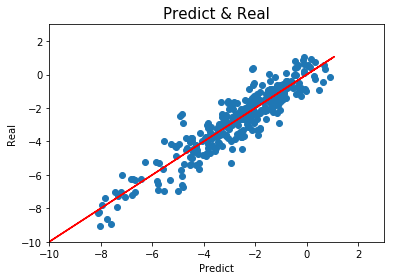

In [17]:
plt.scatter(y_predict.data.numpy(), y_test.data.numpy())

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Predict')
plt.ylabel('Real')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(y_test.data.numpy(), y_test.data.numpy(), 'r-') 
plt.show()